<a href="https://colab.research.google.com/github/rizky-gumelar/Fall-Detection-Classification/blob/main/DataSlayer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle competitions download -c data-slayer-2-0-machine-learning-competition

 97% 604M/623M [00:06<00:00, 225MB/s]
100% 623M/623M [00:06<00:00, 93.3MB/s]


In [ ]:
import zipfile

# Path ke file ZIP yang ingin diekstrak
zip_path = "/content/data-slayer-2-0-machine-learning-competition.zip"

# Path tujuan di Google Drive
extract_to = "/content/drive/MyDrive/ComVis/DataSlayer"

# Ekstraksi file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("File berhasil diekstrak ke:", extract_to)

File berhasil diekstrak ke: /content/drive/MyDrive/ComVis/DataSlayer


In [ ]:
# Path file sumber di Colab
source = "/content/data-slayer-2-0-machine-learning-competition.zip"

# Path tujuan di Google Drive
destination = "/content/drive/MyDrive/ComVis/DataSlayer"

# Copy file
!cp "$source" "$destination"

print("File berhasil dicopy ke:", destination)

File berhasil dicopy ke: /content/drive/MyDrive/ComVis/DataSlayer


In [ ]:
import os
import zipfile
zip_path = '/content/drive/MyDrive/ComVis/DataSlayer/data-slayer-2-0-machine-learning-competition.zip'
extract_path = '/content/dataset'  # Tempat untuk mengekstrak file

# Ekstraksi file ZIP
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Cek apakah dataset berhasil diekstrak
os.listdir(extract_path)

['train', 'sample_submission.csv', 'test']

In [ ]:
import os

for root, dirs, files in os.walk('/content/dataset/train'):
    level = root.replace('/content/dataset/train', '').count(os.sep)
    indent = ' ' * 2 * level
    print(f"{indent}- {os.path.basename(root)}/")  # Cetak hanya folder

- train/
  - subject-4/
    - fall/
      - 4_left_falls/
      - 4_backward_falls/
      - 4_forward_falls/
      - 4_standing_falls/
      - 4_sitting_falls/
      - 4_right_falls/
    - non_fall/
      - 4_squat/
      - 4_walking/
      - 4_jumping/
      - 4_laying/
      - 4_picking/
      - 4_stretching/
  - subject-3/
    - fall/
      - 3_backward_falls/
      - 3_standing_falls/
      - 3_sitting_falls/
      - 3_left_falls/
      - 3_forward_falls/
      - 3_right_falls/
    - non_fall/
      - 3_walking/
      - 3_picking/
      - 3_squat/
      - 3_laying/
      - 3_jumping/
      - 3_stretching/
  - subject-2/
    - fall/
      - 2_backward_falls/
      - 2_left_falls/
      - 2_standing_falls/
      - 2_right_falls/
      - 2_sitting_falls/
      - 2_forward_falls/
    - non_fall/
      - 2_walking/
      - 2_laying/
      - 2_jumping/
      - 2_squat/
      - 2_picking/
      - 2_stretching/
  - subject-1/
    - fall/
      - 1_sitting_falls/
      - 1_right_falls/
    

In [ ]:
# Gausah diRun

import os
import shutil

# Direktori asal
source_dir = '/content/dataset/train/'

# Direktori tujuan
destination_dir = '/content/train_fall_nonfall/'
fall_dir = os.path.join(destination_dir, 'fall')
non_fall_dir = os.path.join(destination_dir, 'non_fall')

# Buat folder tujuan jika belum ada
os.makedirs(fall_dir, exist_ok=True)
os.makedirs(non_fall_dir, exist_ok=True)

# Loop melalui semua subject
for subject in os.listdir(source_dir):
    subject_path = os.path.join(source_dir, subject)
    if not os.path.isdir(subject_path):
        continue

    # Proses folder fall
    fall_path = os.path.join(subject_path, 'fall')
    if os.path.exists(fall_path):
        for sub_folder in os.listdir(fall_path):
            sub_folder_path = os.path.join(fall_path, sub_folder)
            for file in os.listdir(sub_folder_path):
                src_file = os.path.join(sub_folder_path, file)
                dst_file = os.path.join(fall_dir, file)
                shutil.move(src_file, dst_file)

    # Proses folder non_fall
    non_fall_path = os.path.join(subject_path, 'non_fall')
    if os.path.exists(non_fall_path):
        for sub_folder in os.listdir(non_fall_path):
            sub_folder_path = os.path.join(non_fall_path, sub_folder)
            for file in os.listdir(sub_folder_path):
                src_file = os.path.join(sub_folder_path, file)
                dst_file = os.path.join(non_fall_dir, file)
                shutil.move(src_file, dst_file)

print("File berhasil dipindahkan ke folder fall dan non_fall.")


File berhasil dipindahkan ke folder fall dan non_fall.


In [ ]:
import os
import shutil

# Direktori asal
source_dir = '/content/dataset/train/'

# Direktori tujuan
destination_dir = '/content/train_fall_nonfall/'
fall_dir = os.path.join(destination_dir, 'fall')
non_fall_dir = os.path.join(destination_dir, 'non_fall')

# Buat folder tujuan jika belum ada
os.makedirs(fall_dir, exist_ok=True)
os.makedirs(non_fall_dir, exist_ok=True)

# Fungsi untuk memastikan file memiliki nama unik
def get_unique_filename(dst_dir, filename):
    base, ext = os.path.splitext(filename)
    counter = 1
    unique_name = filename
    while os.path.exists(os.path.join(dst_dir, unique_name)):
        unique_name = f"{base}_{counter}{ext}"
        counter += 1
    return unique_name

# Loop melalui semua subject
for subject in os.listdir(source_dir):
    subject_path = os.path.join(source_dir, subject)
    if not os.path.isdir(subject_path):
        continue

    # Proses folder fall
    fall_path = os.path.join(subject_path, 'fall')
    if os.path.exists(fall_path):
        for sub_folder in os.listdir(fall_path):
            sub_folder_path = os.path.join(fall_path, sub_folder)
            for file in os.listdir(sub_folder_path):
                src_file = os.path.join(sub_folder_path, file)
                unique_name = get_unique_filename(fall_dir, file)
                dst_file = os.path.join(fall_dir, unique_name)
                shutil.copy(src_file, dst_file)  # Menggunakan copy agar file asli tetap ada

    # Proses folder non_fall
    non_fall_path = os.path.join(subject_path, 'non_fall')
    if os.path.exists(non_fall_path):
        for sub_folder in os.listdir(non_fall_path):
            sub_folder_path = os.path.join(non_fall_path, sub_folder)
            for file in os.listdir(sub_folder_path):
                src_file = os.path.join(sub_folder_path, file)
                unique_name = get_unique_filename(non_fall_dir, file)
                dst_file = os.path.join(non_fall_dir, unique_name)
                shutil.copy(src_file, dst_file)  # Menggunakan copy agar file asli tetap ada

print("File berhasil dipindahkan ke folder fall dan non_fall dengan penamaan unik.")

File berhasil dipindahkan ke folder fall dan non_fall dengan penamaan unik.


In [ ]:
import os

for root, dirs, files in os.walk('/content/train_fall_nonfall'):
    level = root.replace('/content/train_fall_nonfall', '').count(os.sep)
    indent = ' ' * 2 * level
    print(f"{indent}- {os.path.basename(root)}/")  # Cetak hanya folder

- train_fall_nonfall/
  - fall/
  - non_fall/


Gambar dari dataset training:

Kelas: fall


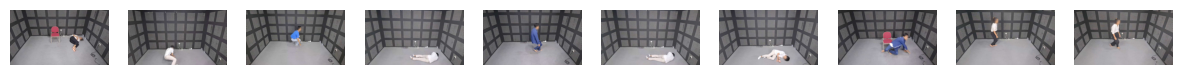


Kelas: non_fall


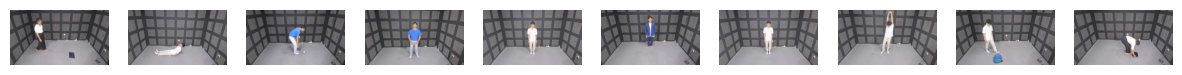

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

# Fungsi untuk menampilkan beberapa gambar dari setiap kelas
def show_images_from_class(directory, num_images=10):
    classes = os.listdir(directory)

    for class_name in classes:
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):
            # Ambil beberapa gambar pertama dari setiap kelas
            image_files = os.listdir(class_path)[:num_images]

            # Menampilkan gambar-gambar tersebut
            print(f"\nKelas: {class_name}")
            plt.figure(figsize=(15, 5))

            for i, image_file in enumerate(image_files):
                img_path = os.path.join(class_path, image_file)
                img = Image.open(img_path)

                plt.subplot(1, num_images, i + 1)
                plt.imshow(img)
                plt.axis('off')

            plt.show()

# Tampilkan gambar dari dataset training
print("Gambar dari dataset training:")
show_images_from_class('/content/train_fall_nonfall')

In [ ]:
import os

# Path ke direktori dataset baru (training dan testing)
train_dir = '/content/train_fall_nonfall'

os.makedirs(train_dir, exist_ok=True)

# Menghitung jumlah gambar di setiap kelas pada training data
print("Jumlah gambar di setiap kelas pada training set:")
for class_name in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_name)
    if os.path.isdir(class_path):
        num_images = len(os.listdir(class_path))
        print(f"{class_name}: {num_images} gambar")


Jumlah gambar di setiap kelas pada training set:
fall: 1546 gambar
non_fall: 2748 gambar


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping


# Data generator
train_datagen = ImageDataGenerator(
    rescale=1./255,          # Normalisasi pixel ke [0, 1]
    rotation_range=40,       # Rotasi gambar hingga 40 derajat
    width_shift_range=0.2,   # Geser gambar secara horizontal
    height_shift_range=0.2,  # Geser gambar secara vertikal
    shear_range=0.2,         # Geser sudut gambar
    zoom_range=0.2,          # Zoom gambar
    horizontal_flip=True,    # Membalik gambar secara horizontal
    fill_mode='nearest',     # Mengisi ruang kosong yang dihasilkan dari transformasi
    validation_split=0.2     # Split data 80% training, 20% validation
)

# Data generator untuk training
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # Ubah ukuran gambar sesuai kebutuhan
    batch_size=32,
    class_mode='binary',     # Karena dua kelas
    subset='training',       # Subset untuk training
    # color_mode='grayscale'   # Menggunakan mode grayscale
)

# Data generator untuk validasi
val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation',
    # color_mode='grayscale'   # Menggunakan mode grayscale
)

# Melihat mapping label
print(train_generator.class_indices)



Found 3436 images belonging to 2 classes.
Found 858 images belonging to 2 classes.
{'fall': 0, 'non_fall': 1}


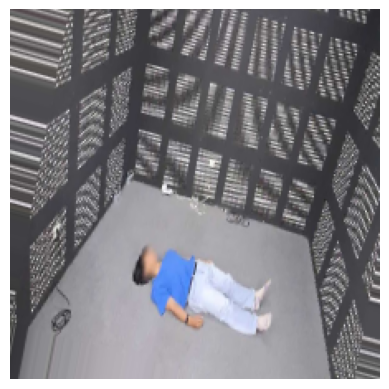

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Ambil satu batch dari generator (training atau validation)
x_batch, y_batch = next(train_generator)  # Anda bisa mengganti train_generator dengan val_generator untuk validasi

# Pilih gambar pertama dari batch (batch size adalah 32, kita ambil gambar pertama)
image = x_batch[0]

# Menampilkan gambar yang sudah diaugmentasi
# plt.imshow(image.reshape(150, 150), cmap='gray')  # Menggunakan cmap='gray' untuk menampilkan grayscale
plt.imshow(image)
plt.axis('off')  # Menghilangkan axis
plt.show()


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

x_batch, y_batch = next(train_generator)
print(f"Tipe x_batch: {type(x_batch)}")  # Pastikan ini numpy array
print(f"Shape x_batch: {x_batch.shape}")  # Harus sesuai dengan ukuran input (misalnya (32, 150, 150, 3))
print(f"Shape y_batch: {y_batch.shape}")  # Sesuai dengan jumlah kelas (misalnya (32, 12))

Tipe x_batch: <class 'numpy.ndarray'>
Shape x_batch: (32, 224, 224, 3)
Shape y_batch: (32,)


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Membuat arsitektur model CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),  # Dropout untuk mengurangi overfitting
    layers.Dense(1, activation='sigmoid')
])

# Compile model
model.compile(
    loss='binary_crossentropy',  # binary_crossentropy untuk 2 kelas
    optimizer='adam',
    metrics=['accuracy']
)

# Melatih model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
    callbacks=[early_stopping_callback],
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


107/107 ━━━━━━━━━━━━━━━━━━━━ 82s 662ms/step - accuracy: 0.6261 - loss: 0.7023 - val_accuracy: 0.6442 - val_loss: 0.6508
Epoch 2/10
  1/107 ━━━━━━━━━━━━━━━━━━━━ 7s 68ms/step - accuracy: 0.6250 - loss: 0.6667

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


107/107 ━━━━━━━━━━━━━━━━━━━━ 7s 62ms/step - accuracy: 0.6250 - loss: 0.6667 - val_accuracy: 0.5000 - val_loss: 0.7156
Epoch 3/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 123s 600ms/step - accuracy: 0.6670 - loss: 0.6133 - val_accuracy: 0.6130 - val_loss: 1.0642
Epoch 4/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 8s 71ms/step - accuracy: 0.5938 - loss: 0.6037 - val_accuracy: 0.6538 - val_loss: 1.0997
